In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA CLEANING AND LOADING

In [21]:
df = pd.read_csv('retail_sales_dataset.csv')

df.shape

(1000, 9)

In [19]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
print("Total Sales : {}".format(df["Quantity"].sum()))
print("Total Profit : {}".format(df["Total Amount"].sum()))

Total Sales : 2514
Total Profit : 456000


### DESCRIPTIVE STATISTICS

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


### Time Series Analysis- Sales Trend over Time

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

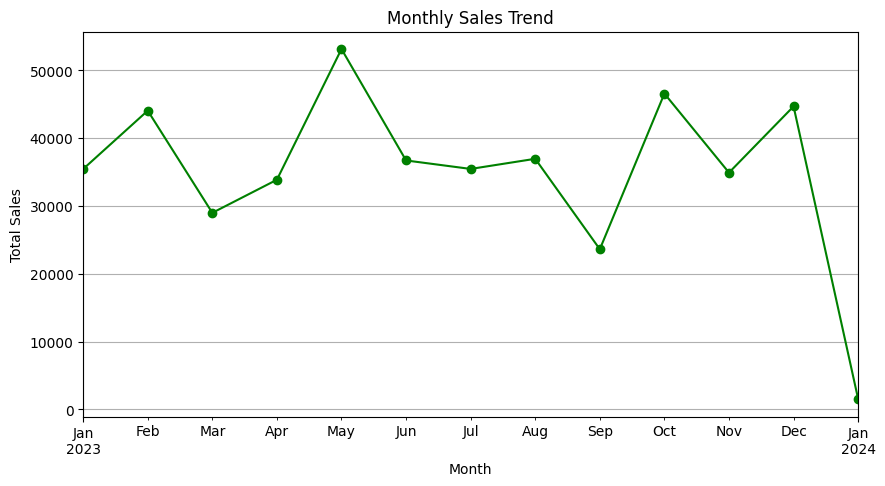

In [27]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

### Customer Analysis

In [28]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)


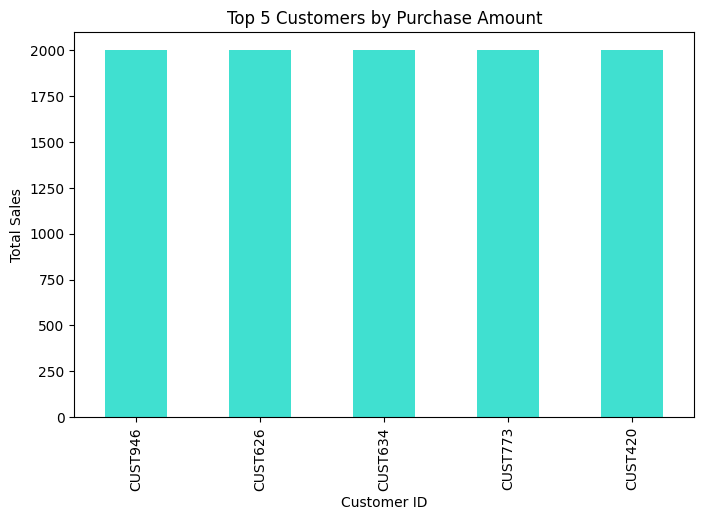

In [60]:
plt.figure(figsize=(8,5))
top_customers.plot(kind='bar', color='Turquoise')
plt.title("Top 5 Customers by Purchase Amount")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.show()

### Product Analysis

In [34]:
product_sales = df.groupby('Product Category')['Total Amount'].sum()


In [39]:
top_products = product_sales.sort_values(ascending=False).head()
print(top_products)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


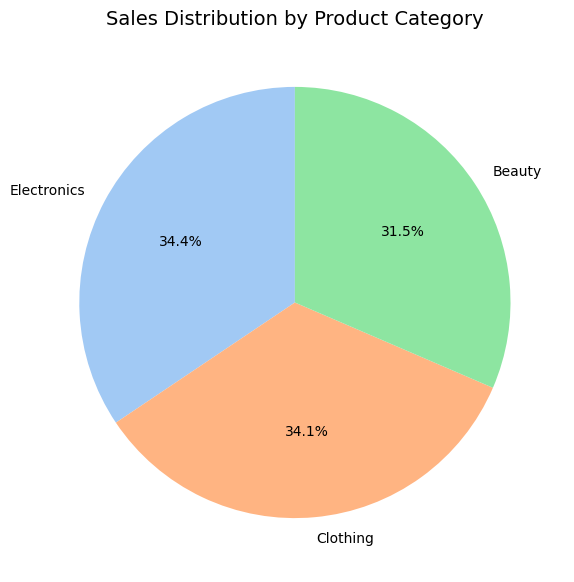

In [36]:
# Pie chart visualization
plt.figure(figsize=(7,7))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Sales Distribution by Product Category", fontsize=14)
plt.show()

### Correlation Heatmap - (for numeric columns)

In [54]:
# Select numeric columns only (exclude anything that can't be converted to numbers)
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

print("Numeric columns used for heatmap:")
print(numeric_df.columns.tolist())

Numeric columns used for heatmap:
['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']


In [55]:
corr = numeric_df.corr(numeric_only=True)

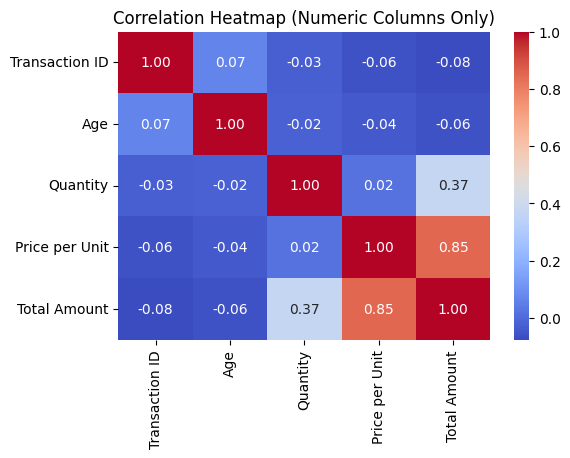

In [56]:
# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)", fontsize=12)
plt.show()

### Sales Contribution by Gender

In [43]:
# Group sales by gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

In [44]:
print(gender_sales)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


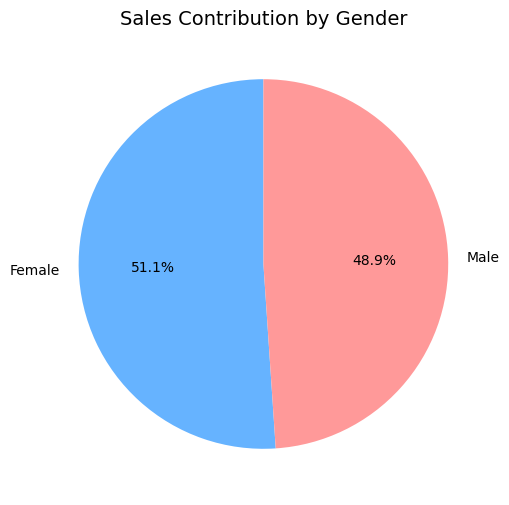

In [45]:
plt.figure(figsize = (6,6))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Sales Contribution by Gender", fontsize=14)
plt.show()

### Sales by Age Group

In [47]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20','21-30','31-40','41-50','51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels, right=False)

In [48]:
# Group by Age Group and sum sales
age_sales = df.groupby('Age Group')['Total Amount'].sum()
print(age_sales)

Age Group
<20      26085
21-30    97070
31-40    96325
41-50    93365
51-60    98340
60+      44815
Name: Total Amount, dtype: int64


C:\Users\PRITI ROUT\AppData\Local\Temp\ipykernel_4424\2603405351.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age Group')['Total Amount'].sum()


C:\Users\PRITI ROUT\AppData\Local\Temp\ipykernel_4424\3177441195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_sales.index, y=age_sales.values, palette='coolwarm')


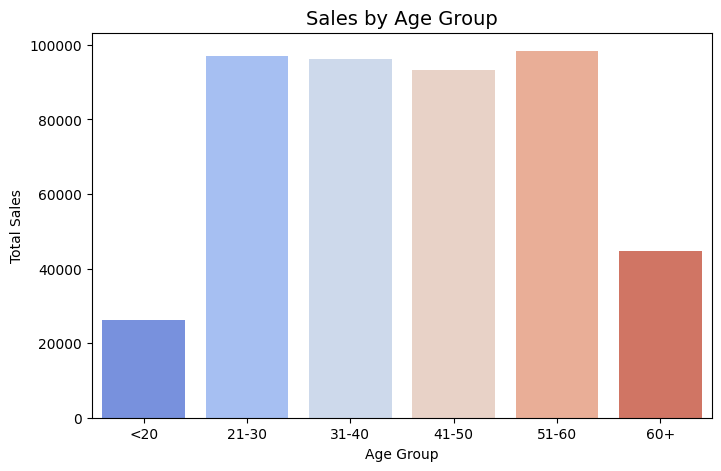

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x=age_sales.index, y=age_sales.values, palette='coolwarm')
plt.title("Sales by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Total Sales")
plt.show()